# Topic Analysis
Cluster speech data into distinct topics

## Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

## Plot Settings

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects

In [4]:
# format style
plt.style.use('fivethirtyeight')
# lineweight
plt.rc('lines', linewidth=3)
# figure size
plt.rc('figure', figsize=(12, 7))
# title fontsize
plt.rc('axes', titlesize=33) 
# axes label fontsize
plt.rc('axes', labelsize=28)
# axes values fontsize
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
# legend fontsize
plt.rc('legend', fontsize=20)

## Functions

In [5]:
# function to print top words of topic model
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}: ".format(index)
        message += "; ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

## Data

In [6]:
transcripts = pd.read_csv('data/cln_transcripts.csv', index_col=0)
transcripts.head()

,Title,Date,President,Type,Transcript
0,"April 30, 1789: First Inaugural Address",1789-04-30,George Washington,inauguration,Fellow Citizens of the Senate and the House of...
1,"October 3, 1789: Thanksgiving Proclamation",1789-10-03,George Washington,other,Whereas it is the duty of all Nations to ackno...
2,"January 8, 1790: First Annual Message to Congress",1790-01-08,George Washington,state_union,Fellow Citizens of the Senate and House of Rep...
3,"December 8, 1790: Second Annual Message to Con...",1790-12-08,George Washington,state_union,Fellow citizens of the Senate and House of Rep...
4,"December 29, 1790: Talk to the Chiefs and Coun...",1790-12-29,George Washington,other,"I the President of the United States, by my ow..."


# Vectorize Document Text
Create sparse matrix of word counts for each document (presidential address)

In [7]:
# text data
documents = transcripts['Transcript']

In [8]:
# number of documents
num_docs = len(documents)

## TFIDF

In [9]:
# create instance of TFIDF vectorizer
tf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=0.05, ngram_range=(1, 3))

In [10]:
# transform documents into document-term matrix
X = tf_vectorizer.fit_transform(documents)

In [11]:
# create dataframe of document-term matrix
tf_df = pd.DataFrame(X.toarray(), columns=[tf_vectorizer.get_feature_names()])
tf_df.head()

,000,000 000,000 men,000 people,000 year,10,10 000,10 years,100,100 000,...,yes,yesterday,yield,yielding,york,young,young men,young people,youth,zeal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.050819
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02925,0.023455,0.036168,0.0,0.0,0.000000


# Topic Modeling
Generate topics using clustering...

## NMF

In [12]:
# number of topics
num_tops = 20
# create instance of model, input number of topics to output
nmf = NMF(n_components=num_tops, random_state=0)
# run model
nmf.fit(tf_df)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=20, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [13]:
# create array of topic weights per document
topic_array = nmf.transform(tf_df)

In [14]:
# display top words for each topic
print_top_words(nmf, tf_vectorizer.get_feature_names(), 25)


Topic #0: public; commerce; states; congress; british; great; vessels; citizens; war; country; subject; session; treasury; present; tribes; united states; united; necessary; objects; measures; debt; effect; revenue; peace; militia

Topic #1: america; americans; tonight; jobs; new; health; work; health care; children; care; people; american; help; year; child; families; let; businesses; workers; make; economy; insurance; need; college; years

Topic #2: states; united states; united; persons; president united states; president united; proclamation; president; said; united states america; states america; laws; day; independence united states; independence united; whereof; seal; state; city washington; laws united; laws united states; secretary state; thereof; city; america

Topic #3: ve; going; don; people; want; know; got; ll; just; thank; lot; think; like; say; ve got; said; didn; tell; thing; right; everybody; folks; country; years; way

Topic #4: president; mr; mr president; think; c

In [16]:
# general category dictionary
category_dict = {
    0: 'National Issues',
    1: 'National Issues',
    2: 'Government',
    3: 'General Words',
    4: 'Government',
    5: 'Government',
    6: 'Economy',
    7: 'War',
    8: 'War',
    9: 'War',
    10: 'Government',
    11: 'Economy',
    12: 'Economy',
    13: 'International',
    14: 'War',
    15: 'International',
    16: 'Ideals',
    17: 'Government',
    18: 'Ideals',
    19: 'Economy'
}

In [87]:
# topic label dictionary
topic_dict = {
    0: 'National Issues - Sovereignty',
    1: 'National Issues - People',
    2: 'Government - Nation',
    3: 'General Words - General Words',
    4: 'Government - Officials',
    5: 'Government - Organization',
    6: 'Economy - Policy 1',
    7: 'War - Cold War',
    8: 'War - Vietnam War',
    9: 'War - Terror',
    10: 'Government - Departments',
    11: 'Economy - Currency',
    12: 'Economy - Commerce',
    13: 'International - Latin America',
    14: 'War - World War II',
    15: 'International - Global',
    16: 'Ideals - Exemplar',
    17: 'Government - Law',
    18: 'Ideals - Values',
    19: 'Economy - Policy 2'
}

In [88]:
# create topic dataframe
topic_df = pd.DataFrame(topic_array, columns=topic_dict.values())
# convert topic weights to percentile per document
topic_df = round(topic_df.div(topic_df.sum(axis=1), axis=0)*100, 0)
topic_df.head()

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,Government - Departments,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2
0,19.0,0.0,2.0,0.0,3.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
1,5.0,0.0,9.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,6.0,0.0
2,45.0,2.0,5.0,0.0,0.0,39.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0
3,76.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,13.0,0.0,45.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,18.0,0.0,10.0,0.0,0.0,6.0,0.0


In [89]:
# create category dataframe
cat_df = topic_df.copy()
# use categories for column labels
cat_df.columns = category_dict.values()
# sum rows by column name
cat_df = cat_df.groupby(cat_df.columns, axis=1).sum()
cat_df.head()

,Economy,General Words,Government,Ideals,International,National Issues,War
0,0.0,0.0,73.0,7.0,0.0,19.0,0.0
1,0.0,0.0,83.0,6.0,5.0,5.0,0.0
2,0.0,0.0,50.0,0.0,3.0,47.0,1.0
3,10.0,0.0,12.0,0.0,0.0,76.0,1.0
4,1.0,4.0,50.0,6.0,28.0,13.0,0.0


# Topic Vizualization

In [90]:
# dictionary to map each category to a color
cat_colors = {
    'Government': 'darkblue', 
    'Economy': 'darkgreen', 
    'War': 'darkred',
    'Ideals': 'darkorange',
    'International': 'purple', 
    'National Issues': 'teal',
    'General Words': 'grey'  
}

## TSNE Plot

In [114]:
def scatter(x, points, colors):

    # create scatter plot
    f = plt.figure(figsize=(20, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:, 0], x[:, 1], lw=0, s=40, color=colors)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # label clusters
    txts = []
    for i in range(len(np.unique(points))):
        # position labels
        xtext, ytext = np.median(x[points == i, :], axis=0)
        # label by specific topic
        txt = ax.text(xtext, ytext, topic_dict[i].split(' - ')[1], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="whitesmoke"),
            PathEffects.Normal()])
        txts.append(txt)

    # color legend
    patch_list = []
    for patch in cat_colors.keys():
        patch_list.append(mpatches.Patch(color=cat_colors[patch], label=patch))
    ax.legend(handles=patch_list, loc="upper left")
    
    return(f, ax, sc, txts)

In [83]:
# create tsne object based on topic array
tsne = TSNE(metric="cosine", random_state=0).fit_transform(topic_array)

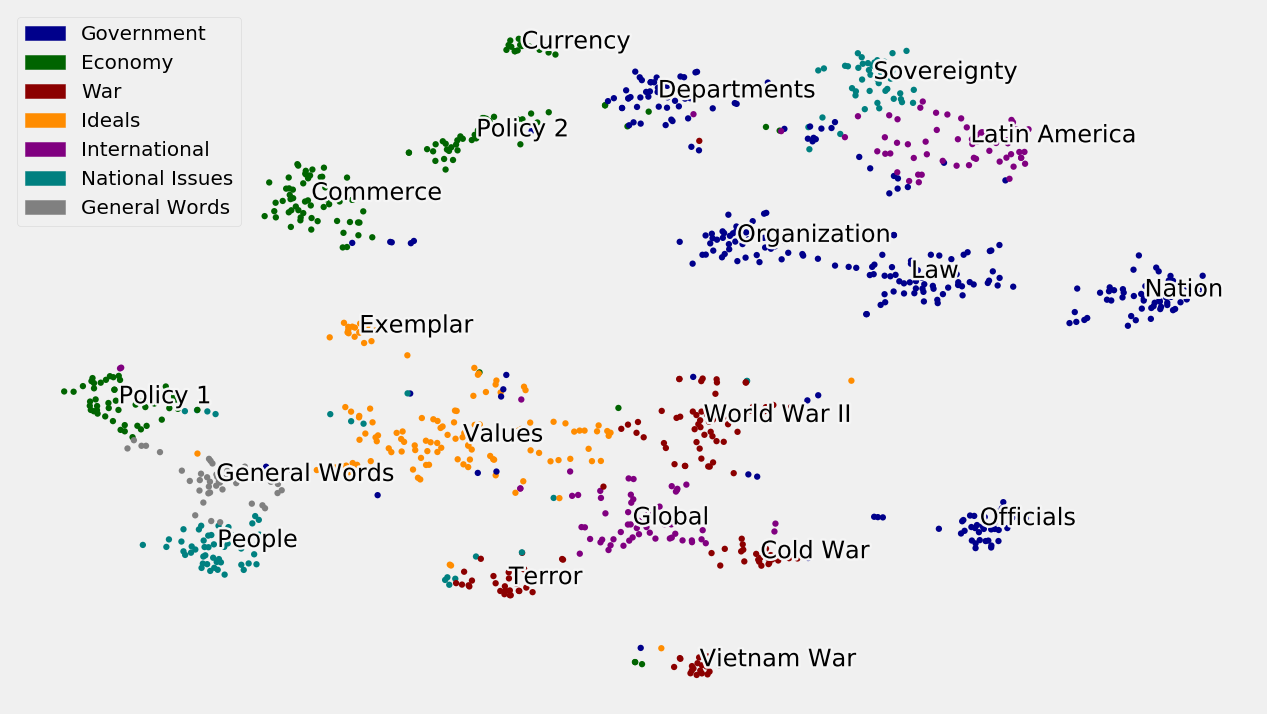

In [115]:
# array of top topic # per document
top_topics = np.argmax(topic_array, axis=1)
# assign colors to topic array
color_array = np.vectorize(cat_colors.__getitem__)(np.vectorize(category_dict.__getitem__)(top_topics))
# call plot function
scatter(tsne, top_topics, color_array);

## Plot Topic Frequency

### Topic Frequency

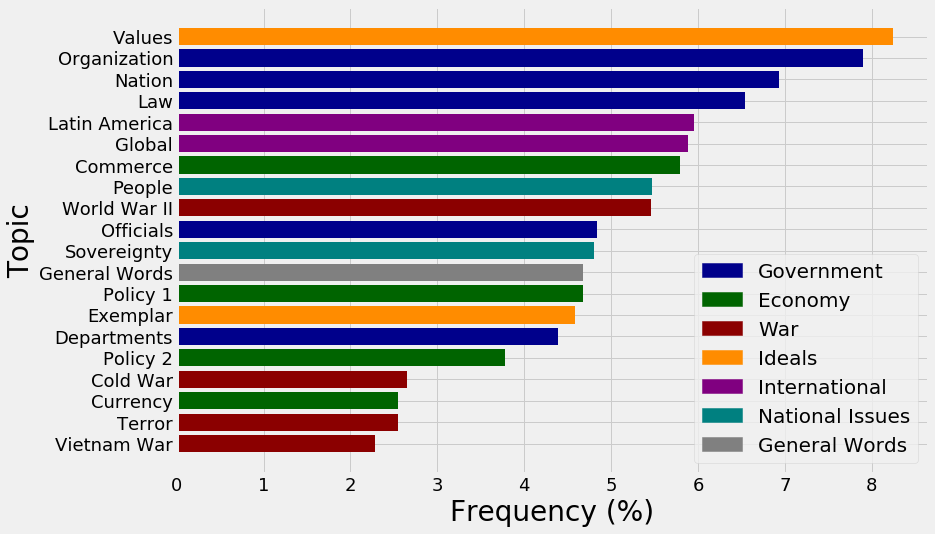

In [92]:
# categories for sorted topic dataframe
top_cats = [label.split(' - ')[0] for label in topic_df.mean().sort_values().index]
# topics for sorted topic dataframe
tops = [label.split(' - ')[1] for label in topic_df.mean().sort_values().index]

# bar plot of topic frequencies
x = tops
y = topic_df.mean().sort_values()
# list of topic color based on its category
color_list = [cat_colors[cat] for cat in top_cats]

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y, color=color_list)
ax.set_yticks(range(len(x)))
ax.set_yticklabels(x)
ax.set_ylabel('Topic')
ax.set_xlabel('Frequency (%)')
# color legend
patch_list = []
for patch in cat_colors.keys():
    patch_list.append(mpatches.Patch(color=cat_colors[patch], label=patch))
plt.legend(handles=patch_list);

### Category Frequency

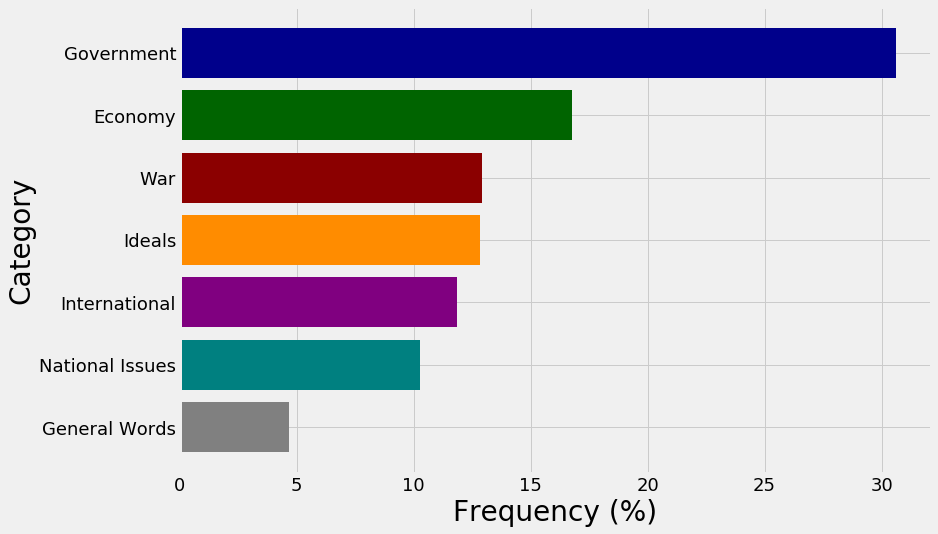

In [91]:
x = cat_df.mean().sort_values().index
y = cat_df.mean().sort_values()
color_list = [cat_colors[cat] for cat in cat_df.mean().sort_values().index]

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y, color=color_list)
ax.set_yticks(range(len(x)))
ax.set_yticklabels(x)
ax.set_ylabel('Category')
ax.set_xlabel('Frequency (%)');

## Categories over Time

In [112]:
# add datetime column
cat_df['Date'] = pd.to_datetime(transcripts.iloc[:, 1])
cat_df.head()

,Economy,General Words,Government,Ideals,International,National Issues,War,Date
0,0.0,0.0,73.0,7.0,0.0,19.0,0.0,1789-04-30
1,0.0,0.0,83.0,6.0,5.0,5.0,0.0,1789-10-03
2,0.0,0.0,50.0,0.0,3.0,47.0,1.0,1790-01-08
3,10.0,0.0,12.0,0.0,0.0,76.0,1.0,1790-12-08
4,1.0,4.0,50.0,6.0,28.0,13.0,0.0,1790-12-29


In [113]:
# function to plot topic category proportions by year
def barplot_cats(df, start_yr, end_yr, colors):
    df[(df.index >= start_yr) & (df.index <= end_yr)].plot(kind='bar', stacked=True, color=colors)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [114]:
# average topic category percentage by year
time_cats = cat_df.groupby(cat_df['Date'].dt.year).mean()
# colors for time categories
time_color_list = [cat_colors[cat] for cat in time_cats.columns]

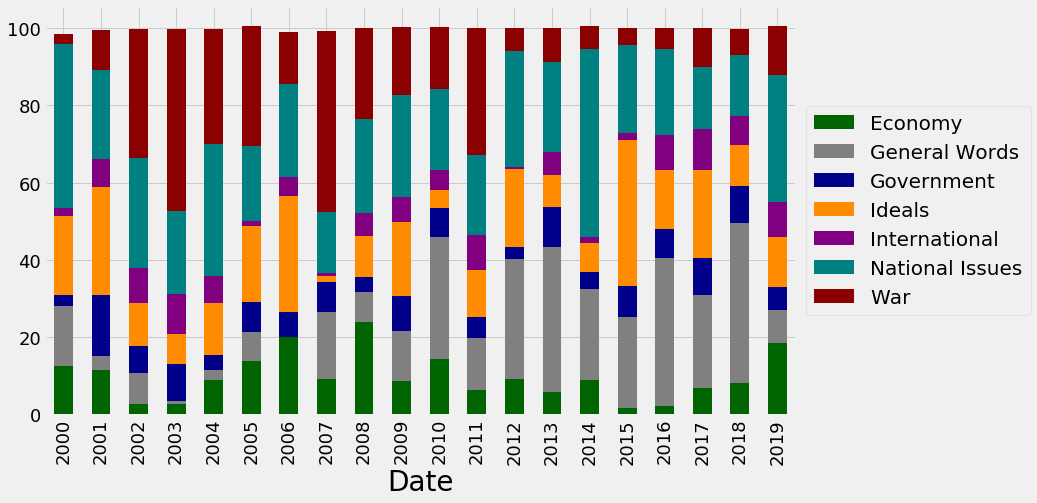

In [115]:
# call plot function
barplot_cats(time_cats, 2000, 2019, time_color_list)

# Topic Analysis

## Sort Topics
Order topic components by weight (percentage) within each document

In [33]:
# topic component percentage array
top_val_sort = topic_df.values.copy()
# sort array by rows (ascending order)
top_val_sort.sort(axis=1)
# sort array in descending order
top_val_sort = top_val_sort[:, ::-1]

In [34]:
# sort topic label array by row (ascending order)
top_lab_sort = np.argsort(topic_df.values)
# sort array in descending order
top_lab_sort = top_lab_sort[:, ::-1]

In [35]:
# interweave sorted label and value arrays for dataframe
top_sort = np.empty((num_docs, num_tops*2))
top_sort[:, 0::2] = top_lab_sort
top_sort[:, 1::2] = top_val_sort

In [36]:
# create primary column labels for dataframe
top_order = []

for place in range(0, num_tops):
    top_order.append('Topic ' + str(place+1))

In [100]:
# function to map topic labels to topic numbers
def top_map(x):
    return(topic_dict[x])

In [148]:
# create final topic dataframe
top_topic_df = pd.DataFrame(top_sort, dtype=int)
# map topic labels
top_topic_df.iloc[:, ::2] = top_topic_df.iloc[:, ::2].applymap(top_map)
# create index for multi-dimensional dataframe
m_idx = pd.MultiIndex.from_product([top_order, ['Topic', '%']])
# create multidimensional dataframe
top_topic_df = pd.DataFrame(top_topic_df.values, columns=m_idx)
# retain only highest topics
top_topic_df = top_topic_df[top_order[:5]]
top_topic_df.head()

Topic 1                            Topic 2      \
                           Topic   %                          Topic   %   
0      Government - Organization  68  National Issues - Sovereignty  19   
1      Government - Organization  74            Government - Nation   9   
2  National Issues - Sovereignty  45      Government - Organization  39   
3  National Issues - Sovereignty  76             Economy - Commerce  10   
4            Government - Nation  45  International - Latin America  18   

                         Topic 3                            Topic 4      \
                           Topic   %                          Topic   %   
0                Ideals - Values   7         Government - Officials   3   
1                Ideals - Values   6  National Issues - Sovereignty   5   
2               Government - Law   6            Government - Nation   5   
3         Government - Officials   6               Government - Law   5   
4  National Issues - Sovereignty  13         International - Global  10   

                     Topic 5     
                       Topic  %  
0        Government - Nation  2  
1     International - Global  5  
2     International - Global  3  
3  Government - Organization  1  
4            Ideals - Values  6

In [149]:
# insert transcript info into top topics dataframe
address_df = top_topic_df.copy()
for column in transcripts.columns[::-1]:
    address_df.insert(0, column, transcripts[column])
address_df.head()

Title        Date  \
                                                                   
0            April 30, 1789: First Inaugural Address  1789-04-30   
1         October 3, 1789: Thanksgiving Proclamation  1789-10-03   
2  January 8, 1790: First Annual Message to Congress  1790-01-08   
3  December 8, 1790: Second Annual Message to Con...  1790-12-08   
4  December 29, 1790: Talk to the Chiefs and Coun...  1790-12-29   

           President          Type  \
                                     
0  George Washington  inauguration   
1  George Washington         other   
2  George Washington   state_union   
3  George Washington   state_union   
4  George Washington         other   

                                          Transcript  \
                                                       
0  Fellow Citizens of the Senate and the House of...   
1  Whereas it is the duty of all Nations to ackno...   
2  Fellow Citizens of the Senate and House of Rep...   
3  Fellow citizens of the Senate and House of Rep...   
4  I the President of the United States, by my ow...   

                         Topic 1                            Topic 2      \
                           Topic   %                          Topic   %   
0      Government - Organization  68  National Issues - Sovereignty  19   
1      Government - Organization  74            Government - Nation   9   
2  National Issues - Sovereignty  45      Government - Organization  39   
3  National Issues - Sovereignty  76             Economy - Commerce  10   
4            Government - Nation  45  International - Latin America  18   

                         Topic 3                            Topic 4      \
                           Topic   %                          Topic   %   
0                Ideals - Values   7         Government - Officials   3   
1                Ideals - Values   6  National Issues - Sovereignty   5   
2               Government - Law   6            Government - Nation   5   
3         Government - Officials   6               Government - Law   5   
4  National Issues - Sovereignty  13         International - Global  10   

                     Topic 5     
                       Topic  %  
0        Government - Nation  2  
1     International - Global  5  
2     International - Global  3  
3  Government - Organization  1  
4            Ideals - Values  6

In [132]:
# create df for top topics
top_df = topic_df.copy()
# add date column
top_df['Date'] = pd.to_datetime(transcripts.iloc[:, 1])
# zero insignifcant topics
top_df.head()

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,...,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2,Date
0,19.0,0.0,2.0,0.0,3.0,68.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1789-04-30
1,5.0,0.0,9.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,6.0,0.0,1789-10-03
2,45.0,2.0,5.0,0.0,0.0,39.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0,1790-01-08
3,76.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1790-12-08
4,13.0,0.0,45.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,18.0,0.0,10.0,0.0,0.0,6.0,0.0,1790-12-29


In [138]:
# average topic category percentage by year
time_tops = top_df.groupby(top_df['Date'].dt.year).mean()
# replace low topics with zero values
time_tops = time_tops.apply(lambda x: [y if y >= 12 else 0 for y in x])
# colors for time categories
time_color_list = [cat_colors[cat.split(' - ')[0]] for cat in time_tops.columns]

In [139]:
time_tops

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,Government - Departments,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2
Date,,,,,,,,,,,,,,,,,,,,
1789,12.000000,0.000000,0.000000,0.000000,0.0,71.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1790,44.666667,0.000000,16.666667,0.000000,0.0,13.666667,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1791,45.000000,0.000000,29.000000,0.000000,0.0,13.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1792,23.000000,0.000000,27.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,34.666667,0.000000,0.000000
1793,13.000000,0.000000,29.666667,0.000000,0.0,13.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,17.000000,0.000000,0.000000
1794,12.666667,0.000000,41.333333,0.000000,0.0,20.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,21.000000,0.000000,0.000000
1795,32.000000,0.000000,42.500000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1796,20.000000,0.000000,0.000000,0.000000,0.0,19.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,18.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1797,24.333333,0.000000,0.000000,0.000000,0.0,28.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,20.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


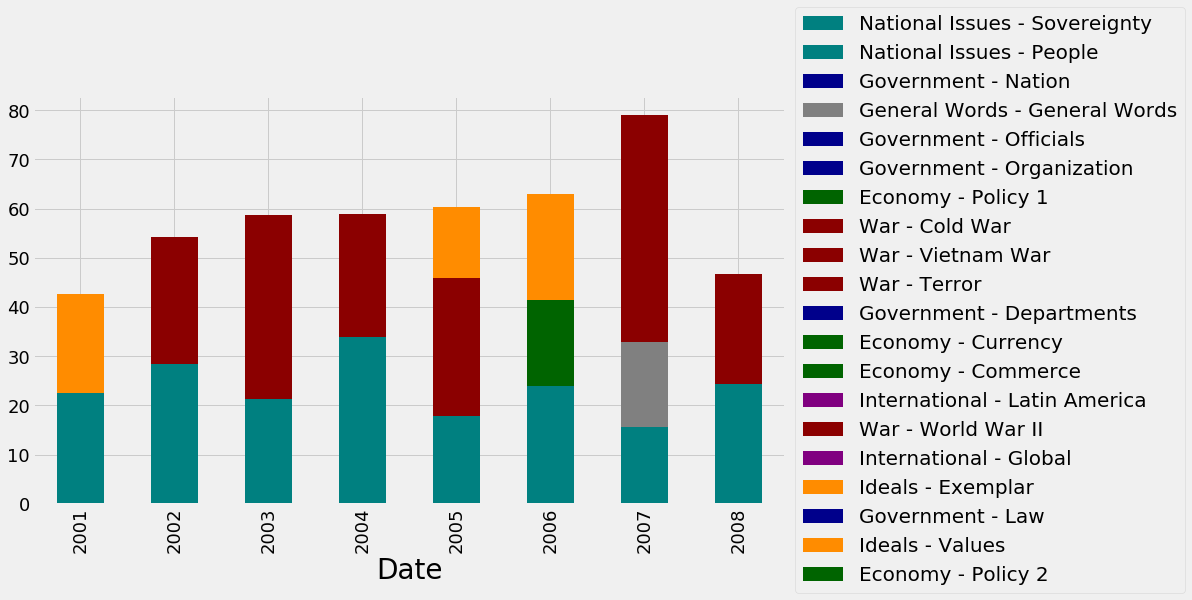

In [140]:
# call plot function
barplot_cats(time_tops, 2001, 2008, time_color_list)

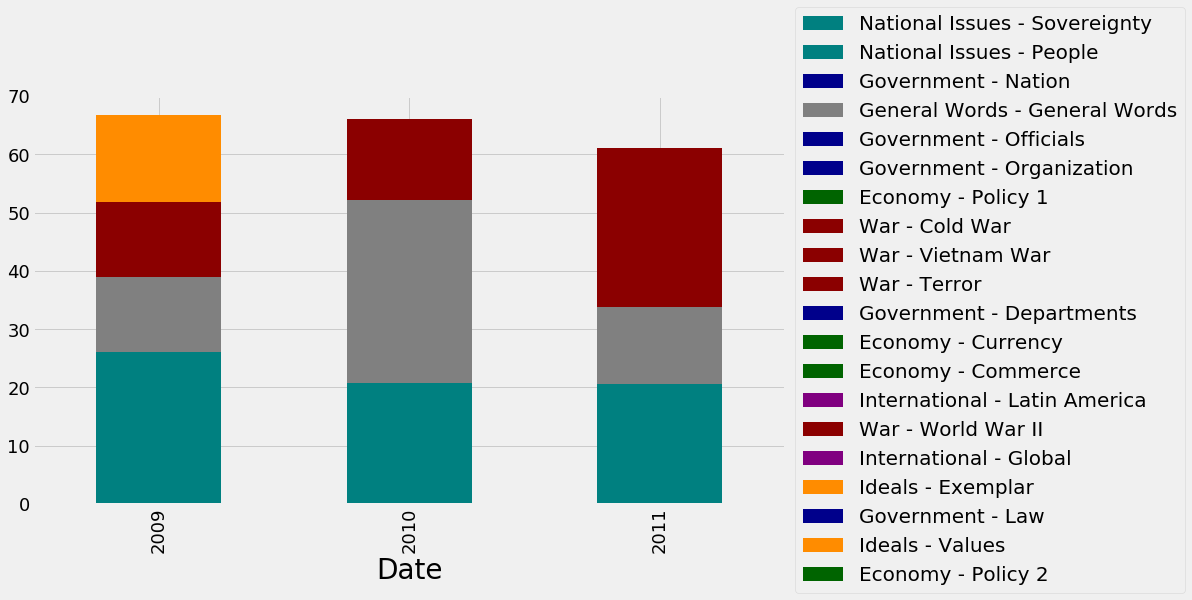

In [141]:
# call plot function
barplot_cats(time_tops, 2009, 2011, time_color_list)

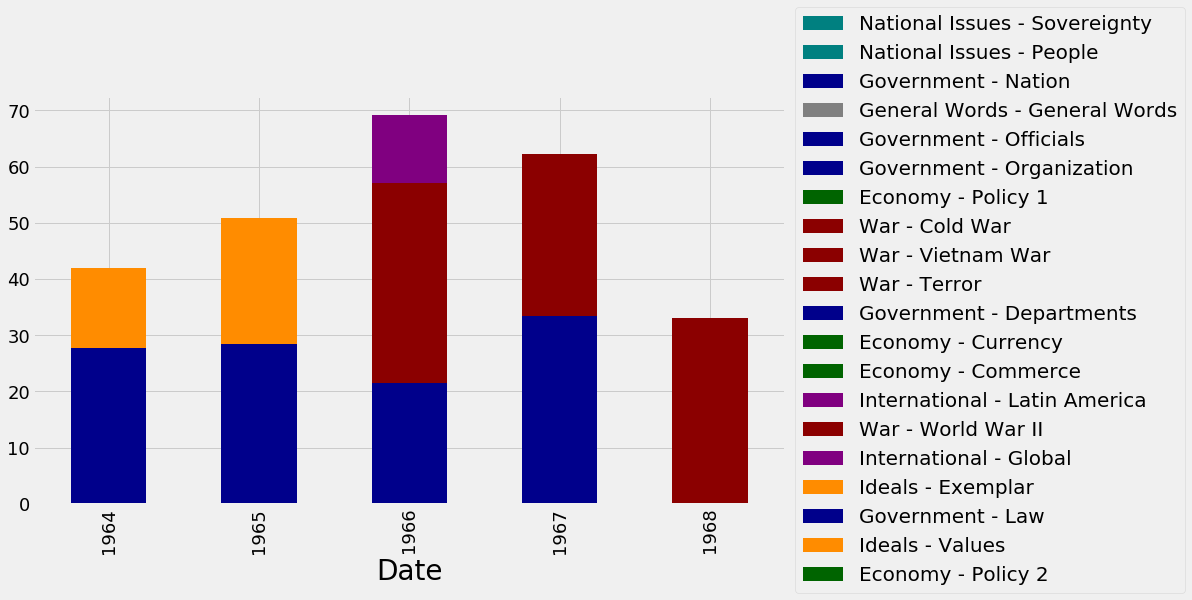

In [142]:
barplot_cats(time_tops, 1964, 1968, time_color_list)

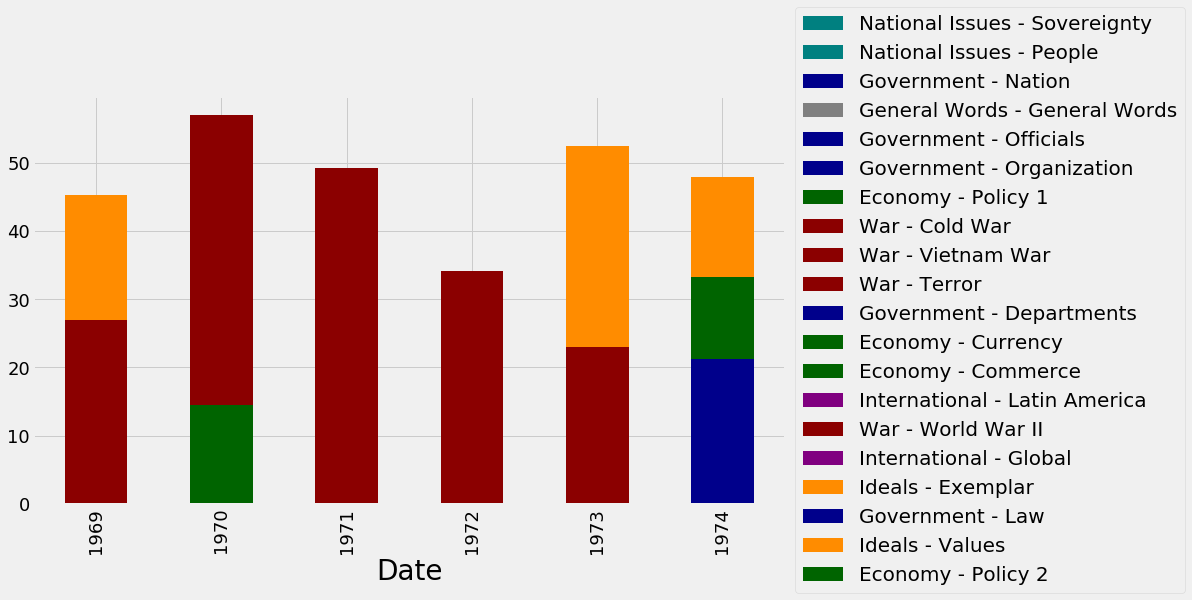

In [143]:
barplot_cats(time_tops, 1969, 1974, time_color_list)

In [146]:
time_tops.loc[1969:1974, :]

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,Government - Departments,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2
Date,,,,,,,,,,,,,,,,,,,,
1969,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,27.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,18.250000,0.0
1970,0.0,0.0,0.0,0.0,0.000000,0.0,14.500000,0.0,42.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0
1971,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,24.5,24.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0
1972,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,34.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0
1973,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.75,0.0,14.750000,0.0
1974,0.0,0.0,0.0,0.0,21.181818,0.0,12.090909,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,14.636364,0.0


In [147]:
time_tops.loc[1940:1945, :]

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,Government - Departments,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2
Date,,,,,,,,,,,,,,,,,,,,
1940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.250000,0.000000,0.0,0.0,13.500000,0.0
1941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.250000,0.000000,0.0,0.0,13.125000,0.0
1942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.250000,0.000000,0.0,0.0,0.000000,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.333333,13.666667,0.0,0.0,0.000000,0.0
1944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.500000,0.000000,0.0,0.0,0.000000,0.0
1945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.444444,25.444444,0.0,0.0,13.333333,0.0


In [109]:
# function to plot topic category proportions by year
def barplot_tops(df, colors):
    df.plot(kind='bar', stacked=True, color=colors)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [108]:
dubya_df = top_topic_df.iloc[transcripts[transcripts['President'] == 'George W. Bush'].index, :]
dubya_df

Date                        Topic 1      \
                                         Topic   %   
890  2000-08-03                Ideals - Values  31   
892  2001-01-20                Ideals - Values  47   
893  2001-01-29       National Issues - People  27   
894  2001-05-11         Government - Officials  33   
895  2001-06-07             Economy - Policy 1  48   
896  2001-08-09                Ideals - Values  42   
897  2001-09-11                Ideals - Values  25   
898  2001-09-21                   War - Terror  32   
899  2002-01-08       National Issues - People  45   
900  2002-01-29                   War - Terror  28   
901  2002-06-01                Ideals - Values  21   
902  2002-06-06                   War - Terror  31   
903  2002-06-19       National Issues - People  70   
904  2002-09-12                   War - Terror  82   
905  2003-01-28                   War - Terror  33   
906  2003-03-17                   War - Terror  78   
907  2003-03-19                   War - Terror  48   
908  2003-11-06                   War - Terror  28   
909  2003-12-08       National Issues - People  81   
910  2004-01-07       National Issues - People  44   
911  2004-01-20       National Issues - People  44   
912  2004-07-17                   War - Terror  30   
913  2004-09-03       National Issues - People  36   
914  2005-01-20                Ideals - Values  48   
915  2005-02-02                   War - Terror  34   
916  2005-08-31  General Words - General Words  29   
917  2005-09-15       National Issues - People  35   
918  2005-12-18                   War - Terror  84   
919  2006-01-31       National Issues - People  28   
920  2006-07-19                Ideals - Values  31   
921  2007-01-10                   War - Terror  90   
922  2007-01-23                   War - Terror  43   
923  2007-04-09  General Words - General Words  51   
924  2008-01-28                   War - Terror  42   
925  2008-03-19                   War - Terror  95   
927  2008-10-03       National Issues - People  32   
929  2008-11-13         International - Global  37   
930  2008-12-19             Economy - Commerce  31   
931  2009-01-12  General Words - General Words  43   
932  2009-01-15                Ideals - Values  33   

                           Topic 2                            Topic 3      
                             Topic   %                          Topic   %  
890       National Issues - People  26  General Words - General Words  16  
892       National Issues - People  19              Ideals - Exemplar  14  
893      Government - Organization  26                Ideals - Values  19  
894         International - Global  25       National Issues - People  21  
895       National Issues - People  15  General Words - General Words  13  
896             Economy - Policy 1  13       National Issues - People  12  
897                   War - Terror  23              Ideals - Exemplar  21  
898       National Issues - People  19                Ideals - Values  16  
899  General Words - General Words  41                Ideals - Values   8  
900       National Issues - People  28              Ideals - Exemplar  10  
901         International - Global  21                   War - Terror  14  
902       National Issues - People  22       Government - Departments  10  
903         International - Global  13       Government - Departments   6  
904         International - Global  16            Government - Nation   1  
905       National Issues - People  26         International - Global  10  
906         International - Global  14            Government - Nation   3  
907             War - World War II  27      Government - Organization   9  
908         International - Global  23                Ideals - Values  21  
909         Government - Officials   8       Government - Departments   5  
910             Economy - Commerce  18                Ideals - Values   8  
911                   War - Terror  35             Economy - Policy 1 

In [157]:
address_df['Date'] = pd.to_datetime(address_df['Date'])

In [74]:
top_topic_df.iloc[transcripts[transcripts['President'] == 'George W. Bush'].index, :]

Date                        Topic 1      \
                                         Topic   %   
890  2000-08-03                Ideals - Values  31   
892  2001-01-20                Ideals - Values  47   
893  2001-01-29       National Issues - People  27   
894  2001-05-11         Government - Officials  33   
895  2001-06-07             Economy - Policy 1  48   
896  2001-08-09                Ideals - Values  42   
897  2001-09-11                Ideals - Values  25   
898  2001-09-21                   War - Terror  32   
899  2002-01-08       National Issues - People  45   
900  2002-01-29                   War - Terror  28   
901  2002-06-01                Ideals - Values  21   
902  2002-06-06                   War - Terror  31   
903  2002-06-19       National Issues - People  70   
904  2002-09-12                   War - Terror  82   
905  2003-01-28                   War - Terror  33   
906  2003-03-17                   War - Terror  78   
907  2003-03-19                   War - Terror  48   
908  2003-11-06                   War - Terror  28   
909  2003-12-08       National Issues - People  81   
910  2004-01-07       National Issues - People  44   
911  2004-01-20       National Issues - People  44   
912  2004-07-17                   War - Terror  30   
913  2004-09-03       National Issues - People  36   
914  2005-01-20                Ideals - Values  48   
915  2005-02-02                   War - Terror  34   
916  2005-08-31  General Words - General Words  29   
917  2005-09-15       National Issues - People  35   
918  2005-12-18                   War - Terror  84   
919  2006-01-31       National Issues - People  28   
920  2006-07-19                Ideals - Values  31   
921  2007-01-10                   War - Terror  90   
922  2007-01-23                   War - Terror  43   
923  2007-04-09  General Words - General Words  51   
924  2008-01-28                   War - Terror  42   
925  2008-03-19                   War - Terror  95   
927  2008-10-03       National Issues - People  32   
929  2008-11-13         International - Global  37   
930  2008-12-19             Economy - Commerce  31   
931  2009-01-12  General Words - General Words  43   
932  2009-01-15                Ideals - Values  33   

                           Topic 2                            Topic 3      
                             Topic   %                          Topic   %  
890       National Issues - People  26  General Words - General Words  16  
892       National Issues - People  19              Ideals - Exemplar  14  
893      Government - Organization  26                Ideals - Values  19  
894         International - Global  25       National Issues - People  21  
895       National Issues - People  15  General Words - General Words  13  
896             Economy - Policy 1  13       National Issues - People  12  
897                   War - Terror  23              Ideals - Exemplar  21  
898       National Issues - People  19                Ideals - Values  16  
899  General Words - General Words  41                Ideals - Values   8  
900       National Issues - People  28              Ideals - Exemplar  10  
901         International - Global  21                   War - Terror  14  
902       National Issues - People  22       Government - Departments  10  
903         International - Global  13       Government - Departments   6  
904         International - Global  16            Government - Nation   1  
905       National Issues - People  26         International - Global  10  
906         International - Global  14            Government - Nation   3  
907             War - World War II  27      Government - Organization   9  
908         International - Global  23                Ideals - Values  21  
909         Government - Officials   8       Government - Departments   5  
910             Economy - Commerce  18                Ideals - Values   8  
911                   War - Terror  35             Economy - Policy 1 

In [64]:
address_df[address_df['President'] == 'George W. Bush']

Title        Date  \
                                                                     
890                August 3, 2000: National Convention  2000-08-03   
892          January 20, 2001: First Inaugural Address  2001-01-20   
893  January 29, 2001: Remarks on Faith-Based and C...  2001-01-29   
894  May 11, 2001: Proposal for Global Fund to Figh...  2001-05-11   
895  June 7, 2001: Remarks on Signing the Economic ...  2001-06-07   
896  August 10, 2001: Address to the Nation on Stem...  2001-08-09   
897  September 11, 2001: Address to the Nation on t...  2001-09-11   
898  September 22, 2001: Address on the U.S. Respon...  2001-09-21   
899  January 8, 2002: Remarks on No Child Left Behi...  2002-01-08   
900       January 29, 2002: State of the Union Address  2002-01-29   
901      June 1, 2002: Graduation Speech at West Point  2002-06-01   
902  June 7, 2002: Address to the Nation on the Dep...  2002-06-06   
903  June 19, 2002: Speech on New Mother and Child ...  2002-06-19   
904  September 12, 2002: Remarks at the UN General ...  2002-09-12   
905       January 28, 2003: State of the Union Address  2003-01-28   
906      March 17, 2003: Address to the Nation on Iraq  2003-03-17   
907  March 20, 2003: Address on the Start of the Ir...  2003-03-19   
908  November 6, 2003: Remarks on Freedom in Iraq a...  2003-11-06   
909  December 8, 2003: Address on Signing Medicare ...  2003-12-08   
910  January 7, 2004: Temporary Worker Program Prop...  2004-01-07   
911       January 20, 2004: State of the Union Address  2004-01-20   
912  July 17, 2004: Remarks on National Security an...  2004-07-17   
913  September 3, 2004: Remarks at the Republican N...  2004-09-03   
914         January 20, 2005: Second Inaugural Address  2005-01-20   
915       February 2, 2005: State of the Union Address  2005-02-02   
916  August 31, 2005: Remarks on Hurricane Katrina ...  2005-08-31   
917  September 16, 2005: Hurricane Relief Address f...  2005-09-15   
918      December 19, 2005: Address on Renewal in Iraq  2005-12-18   
919       January 31, 2006: State of the Union Address  2006-01-31   
920  July 19, 2006: Remarks on Stem Cell Research P...  2006-07-19   
921  January 11, 2007: Address on Military Operatio...  2007-01-10   
922       January 23, 2007: State of the Union Address  2007-01-23   
923  April 9, 2007: Speech on Comprehensive Immigra...  2007-04-09   
924       January 28, 2008: State of the Union Address  2008-01-28   
925       March 19, 2008: Remarks on the War on Terror  2008-03-19   
927  October 3, 2008: Remarks on Emergency Economic...  2008-10-03   
929  November 13, 2008: Speech on Financial Markets...  2008-11-13   
930  December 19, 2008: Remarks on Plan to Assist A...  2008-12-19   
931           January 12, 2009: Final Press Conference  2009-01-12   
932   January 15, 2009: Farewell Address to the Nation  2009-01-15   

          President          Type  \
                                    
890  George W. Bush    convention   
892  George W. Bush  inauguration   
893  George W. Bush         other   
894  George W. Bush         other   
895  George W. Bush         other   
896  George W. Bush      national   
897  George W. Bush      national   
898  George W. Bush         other   
899  George W. Bush         other   
900  George W. Bush   state_union   
901  George W. Bush         other   
902  George W. Bush      national   
903  George W. Bush         other   
904  George W. Bush         other   
905  George W. Bush   state_union   
906  George W. Bush      national   
907  George W. Bush         other   
908  George W. Bush         other   
909  George W. Bush         other   
910  George W. Bush         other   
911  George W. Bush   state_union   
912  George W. Bush         other   
913  George W. Bush    convention   
914  George W. Bush  inauguration   
915  George W. Bush   state_union   
916  George W. Bush         other   
917  George W. Bush         other   
918  George W. Bush         other  

In [65]:
address_df[address_df['President'] == 'Barack Obama']

Title        Date  \
                                                                     
926  August 28, 2008: Acceptance Speech at the Demo...  2008-08-28   
928        November 4, 2008: Remarks on Election Night  2008-11-04   
933                January 20, 2009: Inaugural Address  2009-01-20   
934  January 29, 2009: Remarks on the Lilly Ledbett...  2009-01-29   
935  February 7, 2009: Remarks on the American Reco...  2009-02-07   
936  February 24, 2009: Address Before a Joint Sess...  2009-02-24   
937  May 26, 2009: Remarks on Nominating Judge Soni...  2009-05-26   
938          June 4, 2009: Address at Cairo University  2009-06-04   
939  September 9, 2009: Address to Congress on Heal...  2009-09-09   
940  December 1, 2009: Speech on Strategy in Afghan...  2009-12-01   
941  December 10, 2009: Acceptance of Nobel Peace P...  2009-12-10   
942  January 27, 2010: 2010 State of the Union Address  2010-01-27   
943  February 9, 2010: News Conference on Congressi...  2010-02-09   
944       March 15, 2010: Speech on Health Care Reform  2010-03-15   
945  April 15, 2010: Remarks on Space Exploration i...  2010-04-15   
946      April 28, 2010: Remarks on Wall Street Reform  2010-04-28   
947          June 15, 2010: Speech on the BP Oil Spill  2010-06-15   
948  August 31, 2010: Address on the End of the Com...  2010-08-31   
949  September 23, 2010: Address to the United Nations  2010-09-23   
950  November 3, 2010: Press Conference After 2010 ...  2010-11-03   
951  January 12, 2011: Remarks at Memorial for Vict...  2011-01-12   
952  January 25, 2011: 2011 State of the Union Address  2011-01-25   
953  May 1, 2011: Remarks on the Death of Osama Bin...  2011-05-01   
954  May 19, 2011: Speech on American Diplomacy in ...  2011-05-19   
955    May 25, 2011: Address to the British Parliament  2011-05-25   
956  June 22, 2011: Remarks on the Afghanistan Pullout  2011-06-22   
957  September 8, 2011: Address to Congress on the ...  2011-09-08   
958  October 21, 2011: Remarks on the End of the Wa...  2011-10-21   
959  January 24, 2012: 2012 State of the Union Address  2012-01-24   
960  September 6, 2012: Nominee Acceptance Speech a...  2012-09-06   
961  November 6, 2012: 2012 Election Night Victory ...  2012-11-06   
962  December 16, 2012: Remarks on Sandy Hook Eleme...  2012-12-16   
963         January 21, 2013: Second Inaugural Address  2013-01-21   
964    January 29, 2013: Remarks on Immigration Reform  2013-01-29   
965  February 13, 2013: 2013 State of the Union Add...  2013-02-13   
966  March 1, 2013: Statement on the Government Seq...  2013-03-01   
967    March 21, 2013: Address to the People of Israel  2013-03-21   
968              April 8, 2013: Speech on Gun Violence  2013-04-08   
969           July 19, 2013: Remarks on Trayvon Martin  2013-07-19   
970  July 24, 2013: Remarks on Education and the Ec...  2013-07-24   
971  September 10, 2013: Address to the Nation on S...  2013-09-10   
972      December 4, 2013: Speech on Economic Mobility  2013-12-04   
973  January 28, 2014: 2014 State of the Union Address  2014-01-28   
974  November 20, 2014: Address to the Nation on Im...  2014-11-20   
975  January 20, 2015: 2015 State of the Union Address  2015-01-20   
976  March 7, 2015: Remarks at the 50th Anniversary...  2015-03-07   
977  June 26, 2015: Remarks in Eulogy for the Honor...  2015-06-26   
978  January 12, 2016: 2016 State of the Union Address  2016-01-12   
979      March 22, 2016: Remarks to the People of Cuba  2016-03-22   
980  May 15, 2016: Commencement Address at Rutgers ...  2016-05-15   
981                 January 10, 2017: Farewell Address  2017-01-10   

        President          Type  \
                                  
926  Barack Obama    convention   
928  Barack Obama         other   
933  Barack Obama  inauguration   
934  Barack Obama         other   
935  Barack Obama         other   
936  Barack Obama         other   
937  Barack Obama         other   
938  Barack Obama      

In [48]:
address_df[address_df['President'] == 'Herbert Hoover']

Title        Date  \
                                                                     
486  October 22, 1928: Principles and Ideals of the...  1928-10-22   
488                   March 4, 1929: Inaugural Address  1929-03-04   
489     June 11, 1929: Message Regarding the Farm Bill  1929-06-11   
490  July 24, 1929: Remarks Upon Proclaiming the Tr...  1929-07-24   
491      July 24, 1929: Address on Kellogg-Briand Pact  1929-07-24   
492  September 18, 1929: Message Regarding Internat...  1929-09-18   
493  October 25, 1929: Message Regarding “Black Thu...  1929-10-25   
494           November 5, 1929: Message on the Economy  1929-11-05   
495        November 19, 1929: Statement on the Economy  1929-11-19   
496  December 3, 1929: First State of the Union Add...  1929-12-03   
497  March 7, 1930: Statement Regarding Business an...  1930-03-07   
498  April 28, 1930: Message Regarding Law Enforcement  1930-04-28   
499  June 16, 1930: Message regarding the Smoot-Haw...  1930-06-16   
500  July 7, 1930: Message Regarding London Naval T...  1930-07-07   
501  October 2, 1930: Address to the American Banke...  1930-10-02   
502  December 2, 1930: Second State of the Union ad...  1930-12-02   
503  December 9, 1930: Message Regarding Unemployme...  1930-12-09   
504  February 3, 1931: Statement on Unemployment Re...  1931-02-03   
505  February 26, 1931: Veto Messages Regarding Eme...  1931-02-26   
506          June 21, 1931: Statement on Foreign Debts  1931-06-21   
507   September 22, 1931: Message on the Gold Standard  1931-09-22   
508  October 18, 1931: Message Regarding Unemployme...  1931-10-18   
509  December 8, 1931: Third State of the Union Add...  1931-12-08   
510  December 11, 1931: Statement Regarding Economi...  1931-12-11   
511    May 31, 1932: Statement on the National Economy  1932-05-31   
513  August 11, 1932: Speech Accepting the Republic...  1932-08-11   
514  October 21, 1932: Campaign Speech in Madison S...  1932-10-21   
515  October 28, 1932: Campaign speech in Indianapo...  1932-10-28   
516  November 5, 1932: Campaign speech in St Paul M...  1932-11-05   
517  December 6, 1932: Fourth State of the Union Ad...  1932-12-06   

          President          Type  \
                                    
486  Herbert Hoover         other   
488  Herbert Hoover  inauguration   
489  Herbert Hoover         other   
490  Herbert Hoover         other   
491  Herbert Hoover         other   
492  Herbert Hoover         other   
493  Herbert Hoover         other   
494  Herbert Hoover         other   
495  Herbert Hoover         other   
496  Herbert Hoover   state_union   
497  Herbert Hoover         other   
498  Herbert Hoover         other   
499  Herbert Hoover         other   
500  Herbert Hoover         other   
501  Herbert Hoover         other   
502  Herbert Hoover   state_union   
503  Herbert Hoover         other   
504  Herbert Hoover         other   
505  Herbert Hoover         other   
506  Herbert Hoover         other   
507  Herbert Hoover         other   
508  Herbert Hoover         other   
509  Herbert Hoover   state_union   
510  Herbert Hoover         other   
511  Herbert Hoover         other   
513  Herbert Hoover         other   
514  Herbert Hoover         other   
515  Herbert Hoover         other   
516  Herbert Hoover         other   
517  Herbert Hoover   state_union   

                                            Transcript  \
                                                         
486  This campaign now draws near a close. The plat...   
488  My Countrymen:  This occasion is not alone the...   
489  THE VOTE in the Senate today at best adds furt...   
490  IN APRIL 1928, as a result of discussions betw...   
491  IN APRIL 1928, as a result of discussions betw...   
492  My countrymen and women of the radio audience:...   
493  IN REPLY to press questions as to the business...   
494  THE NATIONAL ECONOMIC CONDITION THE PRESIDENT....   
495   THE ECONOMY AND PUBLIC CONFIDENCE We 

In [47]:
address_df[address_df['President'] == 'Franklin D. Roosevelt']

Title        Date  \
                                                                     
512                  July 2, 1932: National Convention  1932-07-02   
518             March 4, 1933: First Inaugural Address  1933-03-04   
519  March 12, 1933: Fireside Chat 1: On the Bankin...  1933-03-12   
520  May 7, 1933: Fireside Chat 2: On Progress Duri...  1933-05-07   
521  July 24, 1933: Fireside Chat 3: On the Nationa...  1933-07-24   
522  October 22, 1933: Fireside Chat 4: On Economic...  1933-10-22   
523  June 28, 1934: Fireside Chat 5: On Addressing ...  1934-06-28   
524  September 30, 1934: Fireside Chat 6: On Govern...  1934-09-30   
525  April 28, 1935: Fireside Chat 7: On the Works ...  1935-04-28   
526      June 27, 1936: Democratic National Convention  1936-06-27   
527  September 6, 1936: Fireside Chat 8: On Farmers...  1936-09-06   
528  October 31, 1936: Speech at Madison Square Garden  1936-10-31   
529         January 20, 1937: Second Inaugural Address  1937-01-20   
530  March 9, 1937: Fireside Chat 9: On "Court-Pack...  1937-03-09   
531                 October 5, 1937: Quarantine Speech  1937-10-05   
532  October 12, 1937: Fireside Chat 10: On New Leg...  1937-10-12   
533  November 14, 1937: Fireside Chat 11: On the Un...  1937-11-14   
534  April 14, 1938: Fireside Chat 12: On the Reces...  1938-04-14   
535  June 24, 1938: Fireside Chat 13: On Purging th...  1938-06-24   
536  July 8, 1938: Dedication of a Memorial to the ...  1938-07-08   
537  September 3, 1939: Fireside Chat 14: On the Eu...  1939-09-03   
538  May 26, 1940: Fireside Chat 15: On National De...  1940-05-26   
539           June 10, 1940: "Stab in the Back" Speech  1940-06-10   
540      July 19, 1940: Democratic National Convention  1940-07-19   
541  December 29, 1940: Fireside Chat 16: On the "A...  1940-12-29   
542  January 6, 1941: State of the Union (Four Free...  1941-01-06   
543          January 20, 1941: Third Inaugural Address  1941-01-20   
544                      March 15, 1941: On Lend Lease  1941-03-15   
545  May 27, 1941: Fireside Chat 17: On An Unlimite...  1941-05-27   
546  September 11, 1941: Fireside Chat 18: On The G...  1941-09-11   
547  December 8, 1941: Address to Congress Requesti...  1941-12-08   
548  December 9, 1941: Fireside Chat 19: On the War...  1941-12-09   
549  December 11, 1941: Message to Congress Request...  1941-12-11   
550  February 23, 1942: Fireside Chat 20: On the Pr...  1942-02-23   
551     April 28, 1942: Fireside Chat 21: On Sacrifice  1942-04-28   
552  September 7, 1942: Fireside Chat 22: On Inflat...  1942-09-07   
553  October 12, 1942: Fireside Chat 23: On the Hom...  1942-10-12   
554        January 7, 1943: State of the Union Address  1943-01-07   
555  May 2, 1943: Fireside Chat 24: On the Coal Crisis  1943-05-02   
556  July 28, 1943: Fireside Chat 25: On the Fall o...  1943-07-28   
557  September 8, 1943: Fireside Chat 26: On the Ar...  1943-09-08   
558           December 1, 1943: The Tehran Declaration  1943-12-01   
559  December 24, 1943: Fireside Chat 27: On the Te...  1943-12-24   
560  January 11, 1944: Fireside Chat 28: On the Sta...  1944-01-11   
561  June 5, 1944: Fireside Chat 29: On the Fall of...  1944-06-05   
562  June 12, 1944: Fireside Chat 30: Opening Fifth...  1944-06-12   
563      July 20, 1944: Democratic National Convention  1944-07-20   
564         January 20, 1945: Fourth Inaugural Address  1945-01-20   
565  February 11, 1945: Joint Statement with Church...  1945-02-11   
566        March 1, 1945: Address to Congress on Yalta  1945-03-01   

                 President          Type  \
                                           
512  Franklin D. Roosevelt    convention   
518  Franklin D. Roosevelt  inauguration   
519  Franklin D. Roosevelt      fireside   
520  Franklin D. Roosevelt      fireside   
521  Franklin D. Roosevelt      fireside   
522  Franklin D. Roosevelt      fireside   
523  Franklin D. Roosevelt      fireside   
524  Frankli

In [49]:
address_df[address_df['President'] == 'Lyndon B. Johnson']

Title        Date  \
                                                                     
633  May 30, 1963: Remarks at Gettysburg on Civil R...  1963-05-30   
642  November 27, 1963: Address to Joint Session of...  1963-11-27   
643            November 28, 1963: Thanksgiving Message  1963-11-28   
644  December 17, 1963: Address to the U.N. General...  1963-12-17   
645                January 8, 1964: State of the Union  1964-01-08   
646                 February 1, 1964: Press Conference  1964-02-01   
647  February 21, 1964: Remarks at the Ninety Sixth...  1964-02-21   
648  February 29, 1964: Press Conference at the Sta...  1964-02-29   
649  March 7, 1964: Press Conference at the White H...  1964-03-07   
650  April 16, 1964: Press Conference at the State ...  1964-04-16   
651  April 20, 1964: Speech to the Associated Press...  1964-04-20   
652    May 6, 1964: Press Conference on the South Lawn  1964-05-06   
653  May 22, 1964: Remarks at the University of Mic...  1964-05-22   
654  July 2, 1964: Remarks upon Signing the Civil R...  1964-07-02   
655  July 24, 1964: Press Conference at the State D...  1964-07-24   
656  August 4, 1964: Report on the Gulf of Tonkin I...  1964-08-04   
657  August 5, 1964: Remarks on Vietnam at Syracuse...  1964-08-05   
658  August 27, 1964: Acceptance Speech at the Demo...  1964-08-27   
659  October 9, 1964: Speech at the Jung Hotel, New...  1964-10-09   
660  October 18, 1964: Report to the Nation on Even...  1964-10-18   
662                January 4, 1965: State of the Union  1965-01-04   
663                January 20, 1965: Inaugural Address  1965-01-20   
664                 February 4, 1965: Press Conference  1965-02-04   
665  March 13, 1965: Press Conference at the White ...  1965-03-13   
666  March 15, 1965: Speech Before Congress on Voti...  1965-03-15   
667  March 20, 1965: Press Conference at the LBJ Ranch  1965-03-20   
668  March 26, 1965: Remarks at a Reception for Ast...  1965-03-26   
669  March 26, 1965: Statement on Arrests in Violo ...  1965-03-26   
670  April 7, 1965: Address at Johns Hopkins Univer...  1965-04-07   
671  April 27, 1965: Press Conference in the East Room  1965-04-27   
..                                                 ...         ...   
684  January 31, 1966: Statement on the Resumption ...  1966-01-31   
685  February 23, 1966: Remarks on Receiving the Na...  1966-02-23   
686  March 23, 1966: Speech Before the Foreign Inst...  1966-03-23   
687          June 30, 1966: Remarks in Omaha, Nebraska  1966-06-30   
688    July 5, 1966: Press Conference at the LBJ Ranch  1966-07-05   
689  July 12, 1966: Speech on U.S. Foreign Policy i...  1966-07-12   
690   July 20, 1966: Press Conference in the East Room  1966-07-20   
691                  October 6, 1966: Press Conference  1966-10-06   
692  October 15, 1966: Remarks on the Creation of t...  1966-10-15   
693  October 17, 1966: Remarks on Departing for the...  1966-10-17   
694                December 31, 1966: Press Conference  1966-12-31   
695       January 10, 1967: State of the Union Address  1967-01-10   
696                 February 2, 1967: Press Conference  1967-02-02   
697                    March 9, 1967: Press Conference  1967-03-09   
698  March 15, 1967: Address on Vietnam to the Tenn...  1967-03-15   
699  July 24, 1967: Address After Ordering Federal ...  1967-07-24   
700  July 27, 1967: Speech to the Nation on Civil D...  1967-07-27   
701                  August 18, 1967: Press Conference  1967-08-18   
702              September 29, 1967: Speech on Vietnam  1967-09-29   
703                November 17, 1967: Press Conference  1967-11-17   
704  December 19, 1967: A Conversation with Preside...  1967-12-19   
705       January 17, 1968: State of the Union Address  1968-01-17   
706  March 31, 1968: Remarks on Decision not to See...  1968-03-31   
707  April 1, 1968: Address to the National Associa...  1968-04-01   
708                    April 3, 1968: Press Conference  196

In [54]:
address_df.iloc[708, 4]

'  TODAY the Government of North Vietnam made a statement which included the following paragraph, and I quote: "However, for its part, the Government of the Democratic Republic of Vietnam declares its readiness to appoint its representatives to contact the United States representative with a view to determining with the American side the unconditional cessation of the United States bombing raids and all other acts of war against the Democratic Republic of Vietnam so that talks may start." Last Sunday night I expressed the position of the United States with respect to peace in Vietnam and Southeast Asia as follows: "Now, as in the past, the United States is ready to send its representatives to any forum, at any time, to discuss the means of bringing this war to an end." Accordingly, we will establish contact with the representatives of North Vietnam. Consultations with the Government of South Vietnam and our other allies are now taking place. So that you may have as much notice as I am 

In [50]:
address_df[address_df['President'] == 'Richard M. Nixon']

Title        Date  \
                                                                     
585              September 23, 1952: "Checkers" Speech  1952-09-23   
711                August 8, 1968: National Convention  1968-08-08   
715          January 20, 1969: First Inaugural Address  1969-01-20   
716  November 3, 1969: Address to the Nation on the...  1969-11-03   
717       January 22, 1970: State of the Union Address  1970-01-22   
718  April 30, 1970: Address to the Nation on the S...  1970-04-30   
719       January 22, 1971: State of the Union Address  1971-01-22   
720  February 25, 1971: Radio Address About Second ...  1971-02-25   
721  April 7, 1971: Address to the Nation on the Si...  1971-04-07   
722  May 20, 1971: Remarks Announcing an Agreement ...  1971-05-20   
723       January 20, 1972: State of the Union Address  1972-01-20   
724  January 25, 1972: Address to the Nation on Pla...  1972-01-25   
725  May 8, 1972: Address to the Nation on the Situ...  1972-05-08   
726               August 23, 1972: National Convention  1972-08-23   
727          November 6, 1972: Remarks on Election Eve  1972-11-06   
728  November 7, 1972: Remarks on Being Reelected t...  1972-11-07   
729         January 20, 1973: Second Inaugural Address  1973-01-20   
730  January 23, 1973: Address to the Nation Announ...  1973-01-23   
731  April 30, 1973: Address to the Nation About th...  1973-04-30   
732  August 15, 1973: Address to the Nation About t...  1973-08-15   
733       January 30, 1974: State of the Union Address  1974-01-30   
734  February 25, 1974: The President's News Confer...  1974-02-25   
735  April 29, 1974: Address to the Nation on Presi...  1974-04-29   
736  August 8, 1974: Address to the Nation Announci...  1974-08-08   
737                   August 8, 1974: Farewell Address  1974-08-08   
738  August 9, 1974: Remarks on Departure From the ...  1974-08-09   

            President          Type  \
                                      
585  Richard M. Nixon         other   
711  Richard M. Nixon    convention   
715  Richard M. Nixon  inauguration   
716  Richard M. Nixon      national   
717  Richard M. Nixon   state_union   
718  Richard M. Nixon      national   
719  Richard M. Nixon   state_union   
720  Richard M. Nixon         other   
721  Richard M. Nixon      national   
722  Richard M. Nixon         other   
723  Richard M. Nixon   state_union   
724  Richard M. Nixon      national   
725  Richard M. Nixon      national   
726  Richard M. Nixon    convention   
727  Richard M. Nixon         other   
728  Richard M. Nixon         other   
729  Richard M. Nixon  inauguration   
730  Richard M. Nixon      national   
731  Richard M. Nixon      national   
732  Richard M. Nixon      national   
733  Richard M. Nixon   state_union   
734  Richard M. Nixon         other   
735  Richard M. Nixon      national   
736  Richard M. Nixon      national   
737  Richard M. Nixon         other   
738  Richard M. Nixon         other   

                                            Transcript  \
                                                         
585  My Fellow Americans: I come before you tonight...   
711  Sixteen years ago I stood before this Conventi...   
715  Senator Dirksen, Mr. Chief Justice, Mr. Vice P...   
716  Good evening, my fellow Americans:  Tonight I ...   
717  Mr. Speaker, Mr. President, my colleagues in t...   
718  Good evening my fellow Americans: Ten days ago...   
719  Mr. Speaker, Mr. President, my colleagues in t...   
720  Good morning, my fellow Americans: Over the pa...   
721  Good evening, my fellow Americans. Over the pa...   
722  Good afternoon, ladies and gentlemen: As you k...   
723  Mr. Speaker, Mr. President, my colleagues in t...   
724  Good evening: I have asked for this television...   
725  Good evening: Five weeks ago, on Easter weeken...   
726  Four years ago, standing in this very place, I...   
727  Good evening: Tomorrow, 100 million Americans ...   
728  Good

# Topic Analysis

## War

### Civil War

In [119]:
start_date = '1861-04-12'
end_date = '1865-04-09'
barplot_tops(time_cats, start_date, end_date, time_color_list)

TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'numpy.ndarray'

### WW2

In [ ]:
start_date = '1939-09-01'
end_date = '1945-09-02'

In [ ]:
# addresses between dates


### Vietnam

In [166]:
start_date = '1964-08-02'
end_date = '1975-04-30'

In [171]:
address_df[address_df['Title'].str.contains("Vietnam")]

Title       Date  \
                                                                    
657  August 5, 1964: Remarks on Vietnam at Syracuse... 1964-08-05   
684  January 31, 1966: Statement on the Resumption ... 1966-01-31   
698  March 15, 1967: Address on Vietnam to the Tenn... 1967-03-15   
702              September 29, 1967: Speech on Vietnam 1967-09-29   
712  October 31, 1968: Remarks on the Cessation of ... 1968-10-31   
716  November 3, 1969: Address to the Nation on the... 1969-11-03   
724  January 25, 1972: Address to the Nation on Pla... 1972-01-25   
730  January 23, 1973: Address to the Nation Announ... 1973-01-23   
741  September 16, 1974: Remarks on Clemency for Vi... 1974-09-16   
804  May 28, 1984: Remarks Honoring the Vietnam War... 1984-05-28   

             President      Type  \
                                   
657  Lyndon B. Johnson     other   
684  Lyndon B. Johnson     other   
698  Lyndon B. Johnson     other   
702  Lyndon B. Johnson     other   
712  Lyndon B. Johnson     other   
716   Richard M. Nixon  national   
724   Richard M. Nixon  national   
730   Richard M. Nixon  national   
741        Gerald Ford     other   
804      Ronald Reagan     other   

                                            Transcript  \
                                                         
657  Dr. Newhouse, Chancellor Tolley, Governor and ...   
684  Good morning, ladies and gentlemen: For 37 day...   
698  Lieutenant Governor Gorrell, Speaker Cummings,...   
702  Speaker Barnes, Governor Hughes, Governor Smit...   
712  Good evening, my fellow Americans:  I speak to...   
716  Good evening, my fellow Americans:  Tonight I ...   
724  Good evening: I have asked for this television...   
730  Good evening: I have asked for this radio and ...   
741  Good morning: In my first week as President, I...   
804    My fellow Americans, Memorial Day is a day o...   

                    Topic 1                     Topic 2      \
                      Topic   %                   Topic   %   
657  International - Global  37     Government - Nation  17   
684       War - Vietnam War  82  International - Global  16   
698       War - Vietnam War  77  Government - Officials   6   
702       War - Vietnam War  67  International - Global  11   
712       War - Vietnam War  79  Government - Officials   9   
716       War - Vietnam War  72      War - World War II   8   
724       War - Vietnam War  61      War - World War II  11   
730       War - Vietnam War  79  International - Global  16   
741  Government - Officials  15       War - Vietnam War  15   
804       War - Vietnam War  55         Ideals - Values  37   

                           Topic 3                       Topic 4      \
                             Topic   %                     Topic   %   
657              War - Vietnam War  16         Ideals - Exemplar   9   
684      Government - Organization   2  Government - Departments   1   
698             Economy - Commerce   4           Ideals - Values   3   
702         Government - Officials   6       Government - Nation   4   
712      Government - Organization   5       Government - Nation   3   
716              Ideals - Exemplar   4            War - Cold War   3   
724       National Issues - People   6    Government - Officials   5   
730              Ideals - Exemplar   6        Economy - Policy 2   0   
741             War - World War II  13  Government - Departments  13   
804  General Words - General Words   6              War - Terror   1   

                           Topic 5      
                             Topic   %  
657         Government - Officials   6  
684             Economy - Policy 2   0  
698         International - Global   3  
702  General Words - General Words   4  
712                 War - Cold War   1  
716             Economy - Policy 1   2  
724                 War - Cold War   4  
730       National Issues - People   0  
741                Ideals - Values  13  
804              

In [179]:
# Johnson topics during Vietnam War
address_df[(address_df['Date'] >= start_date) & (address_df['Date'] <= end_date) & (address_df['President'] == 'Lyndon B. Johnson')]

Title       Date  \
                                                                    
656  August 4, 1964: Report on the Gulf of Tonkin I... 1964-08-04   
657  August 5, 1964: Remarks on Vietnam at Syracuse... 1964-08-05   
658  August 27, 1964: Acceptance Speech at the Demo... 1964-08-27   
659  October 9, 1964: Speech at the Jung Hotel, New... 1964-10-09   
660  October 18, 1964: Report to the Nation on Even... 1964-10-18   
662                January 4, 1965: State of the Union 1965-01-04   
663                January 20, 1965: Inaugural Address 1965-01-20   
664                 February 4, 1965: Press Conference 1965-02-04   
665  March 13, 1965: Press Conference at the White ... 1965-03-13   
666  March 15, 1965: Speech Before Congress on Voti... 1965-03-15   
667  March 20, 1965: Press Conference at the LBJ Ranch 1965-03-20   
668  March 26, 1965: Remarks at a Reception for Ast... 1965-03-26   
669  March 26, 1965: Statement on Arrests in Violo ... 1965-03-26   
670  April 7, 1965: Address at Johns Hopkins Univer... 1965-04-07   
671  April 27, 1965: Press Conference in the East Room 1965-04-27   
672  April 28, 1965: Statement on Sending Troops to... 1965-04-28   
673  May 2, 1965: Report on the Situation in the Do... 1965-05-02   
674  May 13, 1965: Speech to the Association of Ame... 1965-05-13   
675    June 1, 1965: Press Conference in the East Room 1965-06-01   
676  June 4, 1965: Remarks at the Howard University... 1965-06-04   
677  June 11, 1965: Remarks at the Manned Space Fli... 1965-06-11   
678  June 25, 1965: Remarks on the 20th Anniversary... 1965-06-25   
679   July 13, 1965: Press Conference in the East Room 1965-07-13   
680                    July 28, 1965: Press Conference 1965-07-28   
681  August 6, 1965: Remarks on the Signing of the ... 1965-08-06   
682  August 25, 1965: Press Conference at the White... 1965-08-25   
683               January 12, 1966: State of the Union 1966-01-12   
684  January 31, 1966: Statement on the Resumption ... 1966-01-31   
685  February 23, 1966: Remarks on Receiving the Na... 1966-02-23   
686  March 23, 1966: Speech Before the Foreign Inst... 1966-03-23   
687          June 30, 1966: Remarks in Omaha, Nebraska 1966-06-30   
688    July 5, 1966: Press Conference at the LBJ Ranch 1966-07-05   
689  July 12, 1966: Speech on U.S. Foreign Policy i... 1966-07-12   
690   July 20, 1966: Press Conference in the East Room 1966-07-20   
691                  October 6, 1966: Press Conference 1966-10-06   
692  October 15, 1966: Remarks on the Creation of t... 1966-10-15   
693  October 17, 1966: Remarks on Departing for the... 1966-10-17   
694                December 31, 1966: Press Conference 1966-12-31   
695       January 10, 1967: State of the Union Address 1967-01-10   
696                 February 2, 1967: Press Conference 1967-02-02   
697                    March 9, 1967: Press Conference 1967-03-09   
698  March 15, 1967: Address on Vietnam to the Tenn... 1967-03-15   
699  July 24, 1967: Address After Ordering Federal ... 1967-07-24   
700  July 27, 1967: Speech to the Nation on Civil D... 1967-07-27   
701                  August 18, 1967: Press Conference 1967-08-18   
702              September 29, 1967: Speech on Vietnam 1967-09-29   
703                November 17, 1967: Press Conference 1967-11-17   
704  December 19, 1967: A Conversation with Preside... 1967-12-19   
705       January 17, 1968: State of the Union Address 1968-01-17   
706  March 31, 1968: Remarks on Decision not to See... 1968-03-31   
707  April 1, 1968: Address to the National Associa... 1968-04-01   
708                    April 3, 1968: Press Conference 1968-04-03   
709  April 11, 1968: Remarks on Signing the Civil R... 1968-04-11   
710  July 1, 1968: Remarks on Signing the Nuclear N... 1968-07-01   
712  October 31, 1968: Remarks on the Cessation of ... 1968-10-31   
713                 January 14, 1969: Farewell Address 1969-01-14   
714       January 14, 1969: State of the Union 

In [180]:
# Nixon topics during Vietnam War
address_df[(address_df['Date'] >= start_date) & (address_df['Date'] <= end_date) & (address_df['President'] == 'Richard M. Nixon')]

Title       Date  \
                                                                    
711                August 8, 1968: National Convention 1968-08-08   
715          January 20, 1969: First Inaugural Address 1969-01-20   
716  November 3, 1969: Address to the Nation on the... 1969-11-03   
717       January 22, 1970: State of the Union Address 1970-01-22   
718  April 30, 1970: Address to the Nation on the S... 1970-04-30   
719       January 22, 1971: State of the Union Address 1971-01-22   
720  February 25, 1971: Radio Address About Second ... 1971-02-25   
721  April 7, 1971: Address to the Nation on the Si... 1971-04-07   
722  May 20, 1971: Remarks Announcing an Agreement ... 1971-05-20   
723       January 20, 1972: State of the Union Address 1972-01-20   
724  January 25, 1972: Address to the Nation on Pla... 1972-01-25   
725  May 8, 1972: Address to the Nation on the Situ... 1972-05-08   
726               August 23, 1972: National Convention 1972-08-23   
727          November 6, 1972: Remarks on Election Eve 1972-11-06   
728  November 7, 1972: Remarks on Being Reelected t... 1972-11-07   
729         January 20, 1973: Second Inaugural Address 1973-01-20   
730  January 23, 1973: Address to the Nation Announ... 1973-01-23   
731  April 30, 1973: Address to the Nation About th... 1973-04-30   
732  August 15, 1973: Address to the Nation About t... 1973-08-15   
733       January 30, 1974: State of the Union Address 1974-01-30   
734  February 25, 1974: The President's News Confer... 1974-02-25   
735  April 29, 1974: Address to the Nation on Presi... 1974-04-29   
736  August 8, 1974: Address to the Nation Announci... 1974-08-08   
737                   August 8, 1974: Farewell Address 1974-08-08   
738  August 9, 1974: Remarks on Departure From the ... 1974-08-09   

            President          Type  \
                                      
711  Richard M. Nixon    convention   
715  Richard M. Nixon  inauguration   
716  Richard M. Nixon      national   
717  Richard M. Nixon   state_union   
718  Richard M. Nixon      national   
719  Richard M. Nixon   state_union   
720  Richard M. Nixon         other   
721  Richard M. Nixon      national   
722  Richard M. Nixon         other   
723  Richard M. Nixon   state_union   
724  Richard M. Nixon      national   
725  Richard M. Nixon      national   
726  Richard M. Nixon    convention   
727  Richard M. Nixon         other   
728  Richard M. Nixon         other   
729  Richard M. Nixon  inauguration   
730  Richard M. Nixon      national   
731  Richard M. Nixon      national   
732  Richard M. Nixon      national   
733  Richard M. Nixon   state_union   
734  Richard M. Nixon         other   
735  Richard M. Nixon      national   
736  Richard M. Nixon      national   
737  Richard M. Nixon         other   
738  Richard M. Nixon         other   

                                            Transcript  \
                                                         
711  Sixteen years ago I stood before this Conventi...   
715  Senator Dirksen, Mr. Chief Justice, Mr. Vice P...   
716  Good evening, my fellow Americans:  Tonight I ...   
717  Mr. Speaker, Mr. President, my colleagues in t...   
718  Good evening my fellow Americans: Ten days ago...   
719  Mr. Speaker, Mr. President, my colleagues in t...   
720  Good morning, my fellow Americans: Over the pa...   
721  Good evening, my fellow Americans. Over the pa...   
722  Good afternoon, ladies and gentlemen: As you k...   
723  Mr. Speaker, Mr. President, my colleagues in t...   
724  Good evening: I have asked for this television...   
725  Good evening: Five weeks ago, on Easter weeken...   
726  Four years ago, standing in this very place, I...   
727  Good evening: Tomorrow, 100 million Americans ...   
728  Good evening my fellow Americans: Before going...   
729  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...   
730  Good evening: I have asked for this radio and ...   
731  Good evening: I want to 

In [182]:
# Ford topics during Vietnam War
address_df[(address_df['Date'] >= start_date) & (address_df['Date'] <= end_date) & (address_df['President'] == 'Gerald Ford')]

Title       Date  \
                                                                    
739  August 9, 1974: Remarks on Taking the Oath of ... 1974-08-09   
740  September 8, 1974: Remarks on Pardoning Richar... 1974-09-08   
741  September 16, 1974: Remarks on Clemency for Vi... 1974-09-16   
742  September 18, 1974: Address to the General Ass... 1974-09-18   
743       October 8, 1974: "Whip Inflation Now" Speech 1974-10-08   
744       January 15, 1975: State of the Union Address 1975-01-15   
745     April 10, 1975: Address on U.S. Foreign Policy 1975-04-10   
746       April 23, 1975: Remarks at Tulane University 1975-04-23   

       President         Type  \
                                
739  Gerald Ford        other   
740  Gerald Ford        other   
741  Gerald Ford        other   
742  Gerald Ford        other   
743  Gerald Ford        other   
744  Gerald Ford  state_union   
745  Gerald Ford        other   
746  Gerald Ford        other   

                                            Transcript  \
                                                         
739  Mr. Chief Justice, my dear friends, my fellow ...   
740  I have come to a decision which I felt I shoul...   
741  Good morning: In my first week as President, I...   
742  Mr. President, Mr. Secretary General, your Exc...   
743  Mr. Speaker, Mr. President, distinguished gues...   
744  Mr. Speaker, Mr. Vice President, members of th...   
745  Mr. Speaker, Mr. President, distinguished gues...   
746  Mr. President, President Hurley, Senator Johns...   

                      Topic 1                     Topic 2      \
                        Topic   %                   Topic   %   
739           Ideals - Values  33  Government - Officials  20   
740       Government - Nation  30         Ideals - Values  18   
741    Government - Officials  15       War - Vietnam War  15   
742    International - Global  60      Economy - Policy 1  18   
743        Economy - Policy 1  61  Government - Officials  10   
744        Economy - Policy 1  70  International - Global  11   
745         War - Vietnam War  28          War - Cold War  14   
746  National Issues - People  27         Ideals - Values  22   

                       Topic 3                       Topic 4      \
                         Topic   %                     Topic   %   
739  Government - Organization  17         Ideals - Exemplar  14   
740          Ideals - Exemplar  13    Government - Officials  13   
741         War - World War II  13  Government - Departments  13   
742        Government - Nation  13    Government - Officials   4   
743         Economy - Commerce   8        War - World War II   6   
744         Economy - Policy 2   4            War - Cold War   4   
745     International - Global  14        Economy - Policy 1  13   
746          Ideals - Exemplar  15    International - Global  14   

                       Topic 5      
                         Topic   %  
739           Government - Law  10  
740  Government - Organization  13  
741            Ideals - Values  13  
742          Ideals - Exemplar   3  
743         Economy - Policy 2   4  
744           Government - Law   3  
745        Government - Nation   8  
746         Economy - Policy 1   8

### Terror

In [ ]:
start_date = '2001-09-11'
end_date = '2011-09-11'

# Recession

### Great Depression

In [ ]:
start_date = '1929-10-29'
end_date = '1939-10-29'

### Great Recession

In [ ]:
start_date = '2007-12-01'
end_date = '2009-06-01'